# Machine Learning Ship Project

# Task 1

## Perform exploratory data analysis (EDA).

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy import mean
from numpy import std
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Set seed for reproducibility
seed (0)

In [2]:
# Take a quick look at a few rows from the data
data = pd.read_excel("C:\\Users\\Danny & Amanda\\Downloads\\data.xlsx")
data.head()

,ts,power_hvac,outside_air_humidity,outside_air_temperature,sea_temperature,speed,power_propulsion
0,2019-01-01T00:00:00,2.01977,78.53003,25.76958,26.67483,14.55234,12.27232
1,2019-01-01T01:00:00,2.05053,80.96663,25.71958,27.11862,13.99801,12.25874
2,2019-01-01T02:00:00,2.05370,84.51196,25.68384,27.05570,13.61092,11.45752
3,2019-01-01T03:00:00,2.04442,85.65088,25.85318,27.18492,9.64000,5.54543
4,2019-01-01T04:00:00,2.01912,83.74000,26.04058,27.23300,9.23427,6.07317


In [3]:
# Check how many rows and columns there are in the dataset
data.shape

(8760, 7)

In [4]:
# See what data types there are and how many rows have values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ts                       8760 non-null   object 
 1   power_hvac               8734 non-null   float64
 2   outside_air_humidity     1717 non-null   float64
 3   outside_air_temperature  1717 non-null   float64
 4   sea_temperature          8734 non-null   float64
 5   speed                    8710 non-null   float64
 6   power_propulsion         8734 non-null   float64
dtypes: float64(6), object(1)
memory usage: 479.2+ KB


In [5]:
# Statistical summary of the dataset
data.describe()

,power_hvac,outside_air_humidity,outside_air_temperature,sea_temperature,speed,power_propulsion
count,8734.000000,1717.000000,1717.000000,8734.000000,8710.000000,8734.000000
mean,1.622184,73.681491,21.385345,22.619775,12.502260,16.691797
std,0.739981,12.477851,6.853577,6.664413,8.359804,14.299209
min,0.411520,32.970960,-0.628540,2.853250,0.000420,0.002000
25%,0.927150,66.169080,17.582430,18.865820,0.209778,0.562560
50%,1.624065,75.067130,24.414430,25.198725,16.175375,16.734850
75%,2.180098,82.462250,26.288710,27.471657,19.693067,29.169805
max,3.442790,100.000000,31.082410,31.043920,26.177370,43.873500


In [6]:
# Caluclate how many missing values are in each column
missing_values_count = data.isnull().sum()
missing_values_count

ts                            0
power_hvac                   26
outside_air_humidity       7043
outside_air_temperature    7043
sea_temperature              26
speed                        50
power_propulsion             26
dtype: int64

In [7]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells)*100
percent_missing

23.180039138943247

Instead of attempting to correct all the missing values at one time, I decide to look at the subsets of data relevant to Task 2 and Task 3 and determine the appropriate way to deal with missing values.

# Task 2

## Perform regression analysis of power_propulsion. Use speed (as the feature) with power_propulsion as the response variable (target variable).

### Instructions:
#### Only consider the data when speed >= 7 knots. Remove outliers. Use polynomial regression and optimize polynomial degrees via K-Fold Cross Validation to avoid overfitting. Report RSME on test data set (80-20 train/test split). Based on your model, what would the propulsion power be at 18 knots?

In [8]:
# Create a subset of the data that is relevant to the task
data_task2 = data[['speed', 'power_propulsion']]
data_task2

,speed,power_propulsion
0,14.55234,12.27232
1,13.99801,12.25874
2,13.61092,11.45752
3,9.64000,5.54543
4,9.23427,6.07317
...,...,...
8755,0.00945,0.00208
8756,0.00977,0.00209
8757,0.00370,0.00207
8758,0.00866,0.00206


Speed and power_propulsion have 50 and 26 values missing respectively. This is a small enough to ignore as it will not affect the results

In [9]:
data_task2 = data_task2.dropna()

In [10]:
# Check to see how many rows there are after dropping the rows with missing values
data_task2.shape

(8684, 2)

In [11]:
# percent of data that is missing
percent_missing = ((data[['speed', 'power_propulsion']].shape[0] - data_task2.shape[0])/data[['speed', 'power_propulsion']].shape[0])*100
percent_missing

0.8675799086757991

In [12]:
# Double-check that there are no more missing values
data_task2.shape
missing=data_task2.isnull().sum().sum()
missing

0

The task instructs to use only data where speed >= 7 knots

In [13]:
data_task2 = data_task2[data_task2['speed'] >= 7]
data_task2 = data_task2.reset_index(drop=True)
print(data_task2)
print(data_task2.shape)

         speed  power_propulsion
0     14.55234          12.27232
1     13.99801          12.25874
2     13.61092          11.45752
3      9.64000           5.54543
4      9.23427           6.07317
...        ...               ...
6260  14.95157          17.01852
6261  15.04532          17.44766
6262  17.35090          17.72840
6263  13.83708          13.58616
6264   7.54217           7.37854

[6265 rows x 2 columns]
(6265, 2)


In [14]:
# Seperate based on features and target variable
x_init = data_task2[['speed']].values # Feature
y_init = data_task2[['power_propulsion']].values # Target variable

Two methods of detecting outliers are:

1) Check if there are outliers past 3 standard deviations

2) Use Interquantile Range to check if there are data points before the 25th percentile or past the 75th percentile

I used both methods to see if there are any differences

In [15]:
x_init_copy = x_init.copy()

# calculate summary statistics
x_init_mean, x_init_std = x_init_copy.mean(), x_init_copy.std()
# identify outliers
cut_off = x_init_std * 3
lower, upper = (x_init_mean - cut_off), (x_init_mean + cut_off)
# identify outliers
outliers = [x for x in x_init_copy if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in x_init_copy if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 6265


In [16]:
# Try IQR for outlier detection
x_init_iqr = x_init.copy()
y_init_iqr = y_init.copy()
Q1 = np.quantile(x_init_iqr, 0.25)
Q3 = np.quantile(x_init_iqr, 0.75)
iqr = Q3-Q1

# Calculate the outlier cutoff
cutoff_iqr = iqr * 1.5
lower_iqr, upper_iqr = Q1 - cut_off, Q3 + cut_off

# identify outliers
outliers = [x for x in x_init_iqr if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# Remove outliers
outliers_removed = [x for x in x_init_iqr if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 0
Non-outlier observations: 6265


No outliers were detected using any of the methods. So I use the original split between the feature and target variable
to conduct polynomial regression

In [17]:
# Set up training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_init, y_init, train_size = 0.8)

# Let's test a few degrees to see what fits best
max_degrees = 9

for degree in range(1, max_degrees):
    x_train_polynomial = PolynomialFeatures(degree = degree).fit_transform(x_train)
    x_test_polynomial = PolynomialFeatures(degree = degree).fit_transform(x_test)
    lin_reg = LinearRegression()
    model = lin_reg.fit(x_train_polynomial, y_train)
    y_train_prediction = model.predict(x_train_polynomial)
    rmse = mean_squared_error(y_train, y_train_prediction, squared = False)

scores = -1 * cross_val_score(lin_reg, x_train_polynomial, y_train, cv = 8, scoring = 'neg_root_mean_squared_error')

RMSE scores:  [4.21283083 4.30858213 4.11507335 4.42198332 3.81627865 4.1765802
 4.03576474 4.10744492]


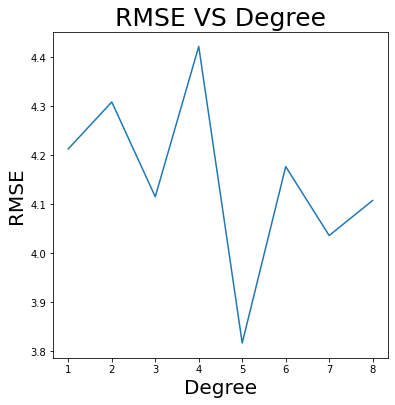

In [18]:
fig, ax = plt.subplots(figsize = (6,6))
ax.plot(range(1, max_degrees), scores)
ax.set_xlabel('Degree', fontsize = 20)
ax.set_ylabel('RMSE', fontsize = 20)
ax.set_title('RMSE VS Degree', fontsize = 25)

print("RMSE scores: ", scores)

Based on the graph, a fifth degree polynomial gives the least error.
So, let's use Polynomial Regression with degree 5 on the test data.

In [19]:
# Now let's use the model to predict on the test data using degree 5.

linear_reg = LinearRegression()
model_lin_reg = linear_reg.fit(PolynomialFeatures(degree = 5).fit_transform(x_test), y_test)
y_test_prediction = model_lin_reg.predict(PolynomialFeatures(degree = 5).fit_transform(x_test))

rmse_y = mean_squared_error(y_test, y_test_prediction, squared = False)
print("RMSE score: ", rmse_y)

RMSE score:  4.050653884163627


In [20]:
# Make a DataFrame of the speed test data and the predicted power propulsion data
x_test_flat = x_test.flatten()
y_test_predicts_flat = y_test_prediction.flatten()
test_predictions = pd.DataFrame({'speed': x_test_flat, 'power_propulsion': y_test_predicts_flat}, columns=['speed', 'power_propulsion'])
test_predictions

,speed,power_propulsion
0,10.34130,6.123972
1,20.83187,34.346444
2,20.79608,34.170932
3,7.60225,3.663755
4,19.64579,28.605901
...,...,...
1248,11.21690,8.194271
1249,20.41817,32.312069
1250,20.43424,32.391019
1251,17.26587,19.737465


Get a subset of the data that only includes speeds between 18 and 19 knots to make it easier to find the row that answers the question

In [21]:
test_predictions_speed_18_knots = test_predictions[(test_predictions['speed'] >= 18) & (test_predictions['speed'] < 19)]
test_predictions_speed_18_knots

,speed,power_propulsion
7,18.89498,25.315032
13,18.99224,25.718349
26,18.29666,23.004150
31,18.71867,24.603143
36,18.24843,22.831073
...,...,...
1214,18.51545,23.814339
1223,18.10982,22.344830
1226,18.31238,23.060995
1239,18.72325,24.621316


In [22]:
test_predictions_speed_18_knots.loc[test_predictions_speed_18_knots['speed'] == test_predictions_speed_18_knots['speed'].min()]

,speed,power_propulsion
626,18.00645,21.993005


So, the answer to the question: "What is the power propulsion when the speed is 18 knots?"
It's about 22 MW

# Task 3

## Perform regression analysis of power_hvac ~ outside_air_temperature + sea_temperature + speed + sog with power_hvac as the response variable.

### Instructions:
### Remove outliers. First perform Principal Component Analysis to get explained variance ratio of each variable. Plot your results and explain your findings. Use Lasso, Ridge and Elastic Net regression to build your model (regularization). Tune your hyperparameters via K-Fold Cross Validation. Using the best parameters, report RSME on the test data set (80-20 train/test split). Which model performed the best? Perform regular linear regression using top 2 principal components instead. How does your results compare to the regressions from the previous step?


SOG is a ship's speed relative to land. It is a sum of a cruise ships speed, wind velocity, and current velocity. Since the description of 'speed' is 'Ship’s speed relative to land', this is SOG and so speed + sog are the same in this situation.

In [23]:
# Obtain the subset relevant to the task
data_task3 = data[['ts', 'power_hvac', 'outside_air_temperature', 'sea_temperature', 'speed']].copy()
data_task3

,ts,power_hvac,outside_air_temperature,sea_temperature,speed
0,2019-01-01T00:00:00,2.01977,25.76958,26.67483,14.55234
1,2019-01-01T01:00:00,2.05053,25.71958,27.11862,13.99801
2,2019-01-01T02:00:00,2.05370,25.68384,27.05570,13.61092
3,2019-01-01T03:00:00,2.04442,25.85318,27.18492,9.64000
4,2019-01-01T04:00:00,2.01912,26.04058,27.23300,9.23427
...,...,...,...,...,...
8755,2019-12-31T19:00:00,0.94602,NaN,21.79653,0.00945
8756,2019-12-31T20:00:00,0.97157,NaN,21.78712,0.00977
8757,2019-12-31T21:00:00,0.93406,NaN,21.79871,0.00370
8758,2019-12-31T22:00:00,1.03367,NaN,21.79068,0.00866


In [24]:
# Check how many missing values is this subset of the data
missing_values_count_task3 = data_task3.isnull().sum()
missing_values_count_task3

ts                            0
power_hvac                   26
outside_air_temperature    7043
sea_temperature              26
speed                        50
dtype: int64

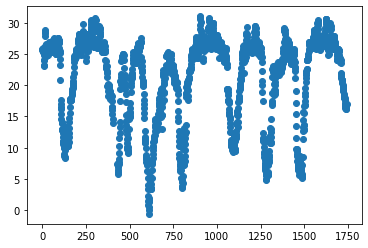

In [25]:
fig_1 = plt.scatter(data_task3.index, data_task3['outside_air_temperature'])

When looking at the data, outside_air_temperature values stop at 3/14/2019 at 14:00. Simple imputation would not works since this is time-series data.  iImputation using mean, for example, would skew results since imputed values will not have the same trend as the rest of the data. Also, there is no data as to where the ship traveled between April and December, so an attempt at finding outside air temperature data cannot be made. The analysis is done using the limited data there is.

In [26]:
data_task3['ts'] = pd.to_datetime(data_task3['ts'], format = "%Y-%m-%d %H:%M:%S")

In [27]:
data_task3['time'] = data_task3['ts'].dt.time

In [28]:
data_task3['ts'] = data_task3['ts'].dt.date
data_task3 = data_task3.rename(columns={'ts': 'date'})
data_task3 = data_task3[['date', 'time', 'power_hvac', 'outside_air_temperature', 'sea_temperature', 'speed']]
data_task3

,date,time,power_hvac,outside_air_temperature,sea_temperature,speed
0,2019-01-01,00:00:00,2.01977,25.76958,26.67483,14.55234
1,2019-01-01,01:00:00,2.05053,25.71958,27.11862,13.99801
2,2019-01-01,02:00:00,2.05370,25.68384,27.05570,13.61092
3,2019-01-01,03:00:00,2.04442,25.85318,27.18492,9.64000
4,2019-01-01,04:00:00,2.01912,26.04058,27.23300,9.23427
...,...,...,...,...,...,...
8755,2019-12-31,19:00:00,0.94602,NaN,21.79653,0.00945
8756,2019-12-31,20:00:00,0.97157,NaN,21.78712,0.00977
8757,2019-12-31,21:00:00,0.93406,NaN,21.79871,0.00370
8758,2019-12-31,22:00:00,1.03367,NaN,21.79068,0.00866


In [29]:
data_task3 = data_task3.dropna()
data_task3 = data_task3.reset_index(drop=True)
data_task3

,date,time,power_hvac,outside_air_temperature,sea_temperature,speed
0,2019-01-01,00:00:00,2.01977,25.76958,26.67483,14.55234
1,2019-01-01,01:00:00,2.05053,25.71958,27.11862,13.99801
2,2019-01-01,02:00:00,2.05370,25.68384,27.05570,13.61092
3,2019-01-01,03:00:00,2.04442,25.85318,27.18492,9.64000
4,2019-01-01,04:00:00,2.01912,26.04058,27.23300,9.23427
...,...,...,...,...,...,...
1712,2019-03-14,10:00:00,0.72233,16.18405,20.01794,19.56097
1713,2019-03-14,11:00:00,0.73985,16.48511,20.65828,19.50237
1714,2019-03-14,12:00:00,0.78417,16.73961,20.54717,18.85918
1715,2019-03-14,13:00:00,0.84567,16.87538,20.32942,18.82308


In [30]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig_data_task3, axs_data_task3 = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs_data_task3[0].bar(grid, evr)
    axs_data_task3[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs_data_task3[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs_data_task3[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig_data_task3.set(figwidth=8, dpi=100)
    return axs_data_task3

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [31]:
features = ['outside_air_temperature', 'sea_temperature', 'speed']

X = data_task3.copy()
y = X.pop('power_hvac')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [32]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3
0,-0.904825,-0.353523,-0.013106
1,-0.951716,-0.297394,0.046800
2,-0.946151,-0.249097,0.050685
3,-1.023910,0.229804,0.114435
4,-1.053018,0.278638,0.107011


In [33]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
outside_air_temperature,-0.708643,0.030369,-0.704914
sea_temperature,-0.698973,-0.166496,0.695497
speed,0.096244,-0.985574,-0.139213


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

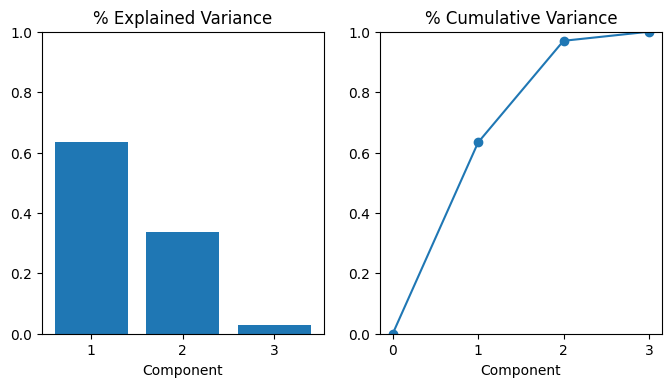

In [34]:
# Look at explained variance
plot_variance(pca)

In [35]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.037205
PC2    0.425835
PC3    0.332192
Name: MI Scores, dtype: float64

In [36]:
# Adding new features to X.
X = X.join(X_pca)

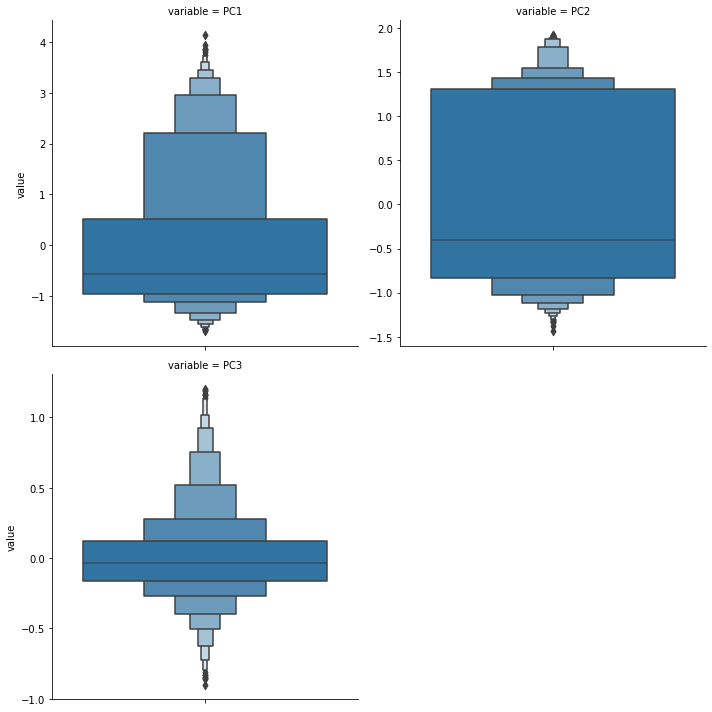

In [37]:
sns.catplot(y="value", col="variable", data=X_pca.melt(), kind='boxen', sharey=False, col_wrap=2,);

Principal Component Analysis can also be used to see if there are any outliers. Any points disconnected from the box graphs would be outliers. Since there are no disconnected points, there are no outliers.

In [38]:
# You can change PC1 to PC2, or PC3
component = "PC1"

data_task3 = data_task3.reset_index(drop=True)
idx = X_pca[component].sort_values(ascending=False).index
data_task3.loc[idx, ["power_hvac"] + features]

,power_hvac,outside_air_temperature,sea_temperature,speed
584,0.58642,-0.62854,3.96689,13.22793
586,0.58518,0.41705,3.26783,0.00649
587,0.59139,1.20987,3.19999,0.00618
583,0.58977,0.05595,5.47436,9.41318
585,0.58517,1.67668,2.99469,0.85811
...,...,...,...,...
306,1.77760,30.42368,27.55540,0.01954
878,2.30827,31.08241,26.94712,0.03310
281,1.99822,30.47277,27.57555,0.00913
304,1.71958,30.66401,27.51930,0.02350


In [39]:
component = 'PC2'

idx_pc2 = X_pca[component].sort_values(ascending=False).index
data_task3.loc[idx_pc2, ["power_hvac"] + features]

,power_hvac,outside_air_temperature,sea_temperature,speed
784,0.48282,13.17521,3.54351,0.00941
785,0.50625,11.45654,3.33757,0.00965
783,0.48555,12.48115,3.57398,0.00906
1073,0.53882,11.88534,3.79661,0.01635
782,0.48518,10.98957,3.64454,0.01518
...,...,...,...,...
538,1.94416,26.94538,26.49010,22.58069
537,1.81838,26.97145,26.32693,22.76536
1160,1.87056,25.89462,26.29194,22.75600
1349,1.75782,23.16909,26.48041,22.92346


In [40]:
component = 'PC3'

idx_pc3 = X_pca[component].sort_values(ascending=False).index
data_task3.loc[idx_pc3, ["power_hvac"] + features]

,power_hvac,outside_air_temperature,sea_temperature,speed
466,0.55795,9.15243,19.39675,0.01083
465,0.55736,9.26486,19.43548,0.00640
463,0.55553,9.37702,19.47662,0.01179
153,0.55047,12.38233,25.72100,20.52482
464,0.55088,9.62176,19.44370,0.00416
...,...,...,...,...
1153,1.84009,25.50866,18.97032,17.99733
1145,1.83654,29.35806,19.71772,0.00682
786,0.52097,11.00284,3.14166,11.91709
1289,0.93017,17.23348,8.92049,9.43260


In [41]:
X

,outside_air_temperature,sea_temperature,speed,PC1,PC2,PC3
0,25.76958,26.67483,14.55234,-0.904825,-0.353523,-0.013106
1,25.71958,27.11862,13.99801,-0.951716,-0.297394,0.046800
2,25.68384,27.05570,13.61092,-0.946151,-0.249097,0.050685
3,25.85318,27.18492,9.64000,-1.023910,0.229804,0.114435
4,26.04058,27.23300,9.23427,-1.053018,0.278638,0.107011
...,...,...,...,...,...,...
1712,16.18405,20.01794,19.56097,0.828073,-0.840512,0.207946
1713,16.48511,20.65828,19.50237,0.730600,-0.847713,0.243309
1714,16.73961,20.54717,18.85918,0.708063,-0.765912,0.216809
1715,16.87538,20.32942,18.82308,0.715923,-0.755617,0.181249


In [42]:
X.isnull().sum()

outside_air_temperature    0
sea_temperature            0
speed                      0
PC1                        0
PC2                        0
PC3                        0
dtype: int64

In [43]:
# Set up training and testing sets
x_train_tsk3, x_test_tsk3, y_train_tsk3, y_test_tsk3 = train_test_split(X, y, train_size = 0.8)

In [44]:
# Let's use LassoCV to find the optimal alpha.
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3)
# define model
model_tsk3 = LassoCV(cv=cv, n_jobs=-1)
# fit model
model_tsk3.fit(x_train_tsk3, y_train_tsk3)
# summarize chosen configuration
print('alpha: %f' % model_tsk3.alpha_)

alpha: 0.003358


In [45]:
# Let's do the same using RidgeCV.
from numpy import arange
from sklearn.linear_model import RidgeCV

# define model evaluation method
cv_ridge = RepeatedKFold(n_splits=10, n_repeats=3)
# define model
model_ridge = RidgeCV(alphas=arange(0.005, 1, 0.01), cv=cv, scoring='neg_root_mean_squared_error')
# fit model
model_ridge.fit(x_train_tsk3, y_train_tsk3)
# summarize chosen configuration
print('alpha: %f' % model_ridge.alpha_)

alpha: 0.995000


In [46]:
# We also do it for Elastic Net.
from sklearn.linear_model import ElasticNetCV

# define model evaluation method
cv_en = RepeatedKFold(n_splits=10, n_repeats=3)
# define model
model_en = ElasticNetCV(cv=cv_en, n_jobs=-1)
# fit model
model_en.fit(x_train_tsk3, y_train_tsk3)
# summarize chosen configuration
print('alpha: %f' % model_en.alpha_)
print('l1_ratio_: %f' % model_en.l1_ratio_)

alpha: 0.006717
l1_ratio_: 0.500000


In [47]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

models = [
            ('Lasso', Lasso(alpha=model_tsk3.alpha_)), 
            ('Ridge', Ridge(alpha=model_ridge.alpha_)), 
            ('Elastic Net', ElasticNet(alpha=model_en.alpha_, l1_ratio=model_en.l1_ratio_))
        ]

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = -1 * cross_val_score(model, x_train_tsk3, y_train_tsk3, cv=kfold, scoring='neg_root_mean_squared_error')
    clf = model.fit(x_train_tsk3, y_train_tsk3)
    y_pred_tsk3 = clf.predict(x_test_tsk3)
    results.append(cv_results)
    names.append(name)
    rmse_y_tsk3 = mean_squared_error(y_test_tsk3, y_pred_tsk3, squared = False)
    msg = "%s: %f (%f) (RMSE score: %f)" % (name, cv_results.mean(), cv_results.std(), rmse_y_tsk3)
    print(msg)

Lasso: 0.270873 (0.028482) (RMSE score: 0.275266)
Ridge: 0.270876 (0.028510) (RMSE score: 0.275139)
Elastic Net: 0.270874 (0.028479) (RMSE score: 0.275274)


The last part of this task is to perform regular linear regression using the top two principal components.

In [48]:
X_PC1_PC2 = X.drop('PC3', axis=1)

In [49]:
# Set up training and testing sets
y_PC1_PC2 = y.copy()
x_train_tsk3_PC1PC2, x_test_tsk3_PC1PC2, y_train_tsk3_PC1PC2, y_test_tsk3_PC1PC2 = train_test_split(X_PC1_PC2, y_PC1_PC2, train_size = 0.8)

linear_reg_PC1_PC2 = LinearRegression()
model_PC1_PC2 = linear_reg_PC1_PC2.fit(x_test_tsk3_PC1PC2, y_test_tsk3_PC1PC2)
y_test_preds_PC1PC2 = model_PC1_PC2.predict(x_test_tsk3_PC1PC2)

rmse_y_PC1_PC2 = mean_squared_error(y_test_tsk3_PC1PC2, y_test_preds_PC1PC2, squared = False)
print("RMSE score: ", rmse_y_PC1_PC2)

RMSE score:  0.26511361444285586


RMSE score of regular Linear Regression is smaller than that of Lasso, Ridge, and Elastic Net showing that regular linear regression performs better than the other three methods in this case.